# MNIST Feed-forward DNN
Modeling reference: https://www.tensorflow.org/tutorials/keras/regression


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

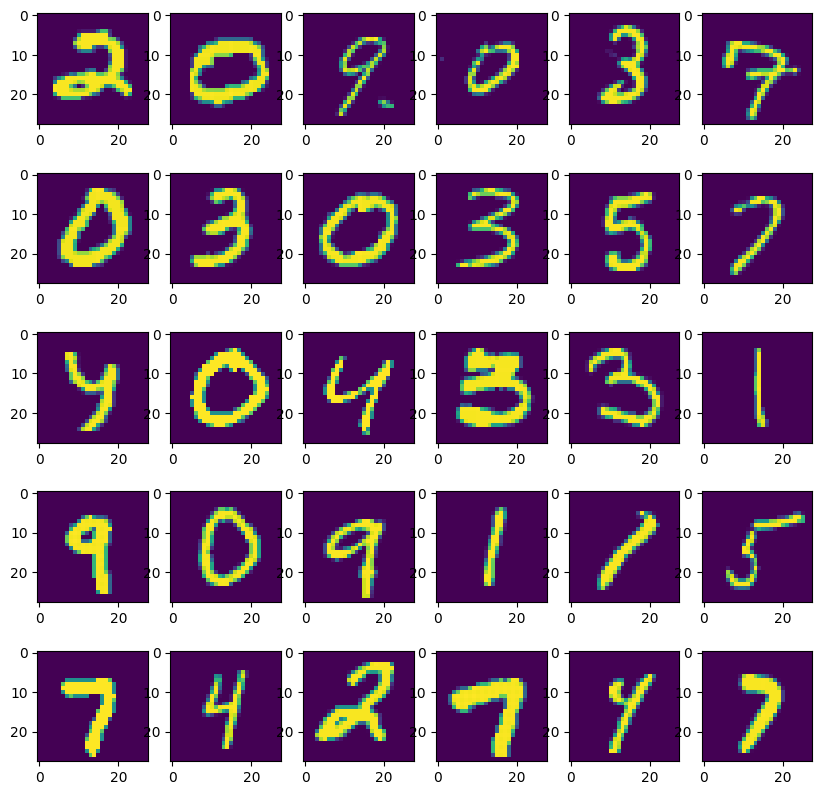

In [3]:
def print_image(row, df):
    temp=df.iloc[row,:].values
    temp = temp.reshape(28,28).astype('uint8')
    plt.imshow(temp)

plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5, 6, i+1)
    print_image(i, test)

In [4]:
y=train['label']
x=train.drop('label',axis='columns')


train.shape

(42000, 785)

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(x, y, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 5s 3ms/step - loss: 1.9011 - accuracy: 0.7983
Epoch 2/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.3928 - accuracy: 0.9017
Epoch 3/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.2771 - accuracy: 0.9266
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2304 - accuracy: 0.9374
Epoch 5/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2006 - accuracy: 0.9444
Epoch 6/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.1839 - accuracy: 0.9483
Epoch 7/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1625 - accuracy: 0.9545
Epoch 8/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.1438 - accuracy: 0.9590
Epoch 9/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.1399 - accuracy: 0.9593
Epoch 10/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.124

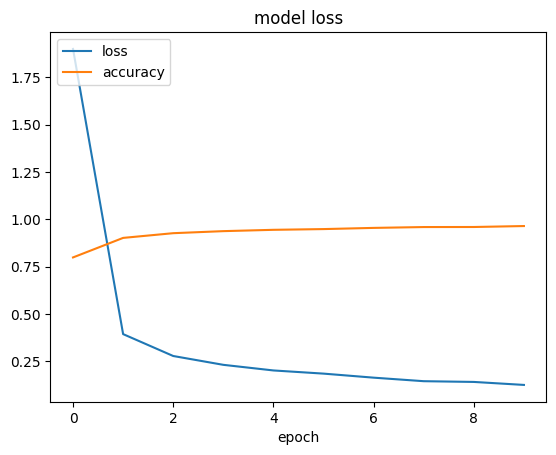

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss')
# plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()

In [7]:
test_loss, test_acc = model.evaluate(x,  y, verbose=2)
# Hello world Kaggle Digit Rec. Submission Score : 0.91267
print('\nTest accuracy:', test_acc)

1313/1313 - 2s - loss: 0.1074 - accuracy: 0.9691 - 2s/epoch - 2ms/step

Test accuracy: 0.9691190719604492


In [8]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

preds = probability_model.predict(test)

875/875 [==============================] - 1s 1ms/step
